# 1. CIFAR 10 model 网络模型

① 下面用 CIFAR 10 model网络来完成分类问题，网络模型如下图所示。

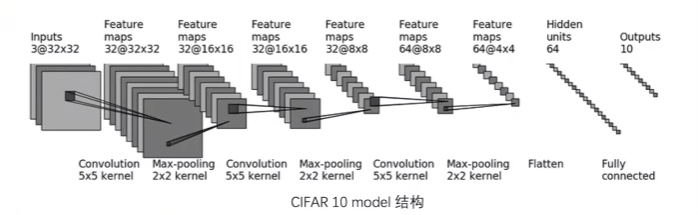

# 2. DataLoader加载数据集

In [1]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data_size, batch_size=64)        
test_dataloader = DataLoader(test_data_size, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000


# 3. 测试网络正确

In [2]:
import torch
from torch import nn

# 搭建神经网络
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
if __name__ == '__main__':
    tudui = Tudui()
    input = torch.ones((64,3,32,32))
    output = tudui(input)
    print(output.shape)  # 测试输出的尺寸是不是我们想要的

torch.Size([64, 10])


# 4. 网络训练数据

In [3]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0

# 训练的轮次
epoch = 10

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        #print("训练次数：{}，Loss：{}".format(total_train_step,loss))  # 方式一：获得loss值
        print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：1，Loss：2.3299059867858887
训练次数：2，Loss：2.3018362522125244
训练次数：3，Loss：2.2983856201171875
训练次数：4，Loss：2.310598611831665
训练次数：5，Loss：2.302191972732544
训练次数：6，Loss：2.303790807723999
训练次数：7，Loss：2.2937326431274414
训练次数：8，Loss：2.285353899002075
训练次数：9，Loss：2.3008460998535156
训练次数：10，Loss：2.287691116333008
训练次数：11，Loss：2.3104374408721924
训练次数：12，Loss：2.2906105518341064
训练次数：13，Loss：2.3315541744232178
训练次数：14，Loss：2.315488815307617
训练次数：15，Loss：2.30043888092041
训练次数：16，Loss：2.3099758625030518
训练次数：17，Loss：2.318608522415161
训练次数：18，Loss：2.312786340713501
训练次数：19，Loss：2.305506944656372
训练次数：20，Loss：2.286158323287964
训练次数：21，Loss：2.2990760803222656
训练次数：22，Loss：2.292771577835083
训练次数：23，Loss：2.29740047454834
训练次数：24，Loss：2.3178415298461914
训练次数：25，Loss：2.305537700653076
训练次数：26，Loss：2.3083934783935547
训练次数：27，Loss：2.296882390975952
训练次数：28，Loss：2.3064374923706055
训练次数

训练次数：254，Loss：2.276651620864868
训练次数：255，Loss：2.2920918464660645
训练次数：256，Loss：2.292379856109619
训练次数：257，Loss：2.2947182655334473
训练次数：258，Loss：2.2737269401550293
训练次数：259，Loss：2.276481866836548
训练次数：260，Loss：2.2916879653930664
训练次数：261，Loss：2.2894699573516846
训练次数：262，Loss：2.2846686840057373
训练次数：263，Loss：2.286881446838379
训练次数：264，Loss：2.2897400856018066
训练次数：265，Loss：2.2885563373565674
训练次数：266，Loss：2.267735719680786
训练次数：267，Loss：2.2872536182403564
训练次数：268，Loss：2.2832367420196533
训练次数：269，Loss：2.277830123901367
训练次数：270，Loss：2.2616238594055176
训练次数：271，Loss：2.294987916946411
训练次数：272，Loss：2.2794108390808105
训练次数：273，Loss：2.273865222930908
训练次数：274，Loss：2.2733335494995117
训练次数：275，Loss：2.3022303581237793
训练次数：276，Loss：2.2857823371887207
训练次数：277，Loss：2.29938006401062
训练次数：278，Loss：2.282853126525879
训练次数：279，Loss：2.2951548099517822
训练次数：280，Loss：2.2780234813690186
训练次数：281，Loss：2.2716073989868164
训练次数：282，Loss：2.2831430435180664
训练次数：283，Loss：2.2874412536621094
训练次数：284，Loss：2.27805

训练次数：507，Loss：2.080049753189087
训练次数：508，Loss：2.13504958152771
训练次数：509，Loss：2.19622802734375
训练次数：510，Loss：2.1606388092041016
训练次数：511，Loss：2.08717942237854
训练次数：512，Loss：1.9604517221450806
训练次数：513，Loss：2.1537373065948486
训练次数：514，Loss：2.1177618503570557
训练次数：515，Loss：2.2401630878448486
训练次数：516，Loss：2.02537202835083
训练次数：517，Loss：2.1135151386260986
训练次数：518，Loss：2.0484378337860107
训练次数：519，Loss：1.9872491359710693
训练次数：520，Loss：2.0878567695617676
训练次数：521，Loss：2.1774821281433105
训练次数：522，Loss：2.1669163703918457
训练次数：523，Loss：2.0920257568359375
训练次数：524，Loss：2.0764260292053223
训练次数：525，Loss：2.0373849868774414
训练次数：526，Loss：2.1710205078125
训练次数：527，Loss：2.0801243782043457
训练次数：528，Loss：2.0651378631591797
训练次数：529，Loss：2.142825126647949
训练次数：530，Loss：2.2416772842407227
训练次数：531，Loss：2.1296536922454834
训练次数：532，Loss：2.050769329071045
训练次数：533，Loss：2.1513543128967285
训练次数：534，Loss：1.940685510635376
训练次数：535，Loss：2.086989402770996
训练次数：536，Loss：2.148232936859131
训练次数：537，Loss：2.09140467643

训练次数：759，Loss：1.934494972229004
训练次数：760，Loss：2.0560684204101562
训练次数：761，Loss：1.9995250701904297
训练次数：762，Loss：2.0021119117736816
训练次数：763，Loss：2.147458791732788
训练次数：764，Loss：2.038159132003784
训练次数：765，Loss：1.9460877180099487
训练次数：766，Loss：2.068439245223999
训练次数：767，Loss：2.1420323848724365
训练次数：768，Loss：2.0517892837524414
训练次数：769，Loss：1.9274462461471558
训练次数：770，Loss：1.943812370300293
训练次数：771，Loss：1.994820237159729
训练次数：772，Loss：1.9304299354553223
训练次数：773，Loss：2.0605850219726562
训练次数：774，Loss：2.0497400760650635
训练次数：775，Loss：2.0961081981658936
训练次数：776，Loss：1.9281277656555176
训练次数：777，Loss：2.0774924755096436
训练次数：778，Loss：2.0410759449005127
训练次数：779，Loss：2.1226587295532227
训练次数：780，Loss：2.0455377101898193
训练次数：781，Loss：2.1226439476013184
训练次数：782，Loss：2.1010429859161377
-----第 2 轮训练开始-----
训练次数：783，Loss：2.0878143310546875
训练次数：784，Loss：1.8932205438613892
训练次数：785，Loss：2.0417253971099854
训练次数：786，Loss：1.823210597038269
训练次数：787，Loss：1.903414011001587
训练次数：788，Loss：1.921396970748901

训练次数：1010，Loss：1.8342539072036743
训练次数：1011，Loss：1.9226385354995728
训练次数：1012，Loss：2.0979416370391846
训练次数：1013，Loss：1.988268494606018
训练次数：1014，Loss：1.85997474193573
训练次数：1015，Loss：1.9200576543807983
训练次数：1016，Loss：1.9893524646759033
训练次数：1017，Loss：2.0215158462524414
训练次数：1018，Loss：2.0954697132110596
训练次数：1019，Loss：2.1690032482147217
训练次数：1020，Loss：1.9422663450241089
训练次数：1021，Loss：1.9412519931793213
训练次数：1022，Loss：1.953891396522522
训练次数：1023，Loss：2.0631794929504395
训练次数：1024，Loss：1.891971230506897
训练次数：1025，Loss：1.8537653684616089
训练次数：1026，Loss：2.1298911571502686
训练次数：1027，Loss：1.8452050685882568
训练次数：1028，Loss：1.8494501113891602
训练次数：1029，Loss：1.9840680360794067
训练次数：1030，Loss：1.9313158988952637
训练次数：1031，Loss：1.8935831785202026
训练次数：1032，Loss：2.0589919090270996
训练次数：1033，Loss：1.896726369857788
训练次数：1034，Loss：1.8639185428619385
训练次数：1035，Loss：1.9617531299591064
训练次数：1036，Loss：1.950738787651062
训练次数：1037，Loss：1.984634518623352
训练次数：1038，Loss：1.9140784740447998
训练次数：1039，Loss：1.99860

训练次数：1256，Loss：1.8875852823257446
训练次数：1257，Loss：1.7297972440719604
训练次数：1258，Loss：1.9401980638504028
训练次数：1259，Loss：1.84554922580719
训练次数：1260，Loss：2.1502153873443604
训练次数：1261，Loss：2.1660289764404297
训练次数：1262，Loss：1.8992183208465576
训练次数：1263，Loss：1.900866150856018
训练次数：1264，Loss：1.9810700416564941
训练次数：1265，Loss：1.930509090423584
训练次数：1266，Loss：1.7322657108306885
训练次数：1267，Loss：1.7608318328857422
训练次数：1268，Loss：1.7474899291992188
训练次数：1269，Loss：2.0730478763580322
训练次数：1270，Loss：2.0162181854248047
训练次数：1271，Loss：1.8390239477157593
训练次数：1272，Loss：1.7208298444747925
训练次数：1273，Loss：2.046449661254883
训练次数：1274，Loss：1.8632593154907227
训练次数：1275，Loss：1.8054256439208984
训练次数：1276，Loss：1.7019072771072388
训练次数：1277，Loss：1.8036834001541138
训练次数：1278，Loss：1.7898770570755005
训练次数：1279，Loss：1.8929158449172974
训练次数：1280，Loss：1.9447907209396362
训练次数：1281，Loss：2.0617096424102783
训练次数：1282，Loss：1.8367925882339478
训练次数：1283，Loss：1.7768640518188477
训练次数：1284，Loss：1.9174777269363403
训练次数：1285，Loss：1.73

训练次数：1499，Loss：1.8029974699020386
训练次数：1500，Loss：1.8692764043807983
训练次数：1501，Loss：1.7454493045806885
训练次数：1502，Loss：1.8182666301727295
训练次数：1503，Loss：1.566670536994934
训练次数：1504，Loss：1.7986804246902466
训练次数：1505，Loss：1.6333297491073608
训练次数：1506，Loss：1.9230384826660156
训练次数：1507，Loss：1.7792179584503174
训练次数：1508，Loss：1.6989635229110718
训练次数：1509，Loss：1.8939838409423828
训练次数：1510，Loss：2.014080286026001
训练次数：1511，Loss：1.653477668762207
训练次数：1512，Loss：1.897768497467041
训练次数：1513，Loss：1.6126937866210938
训练次数：1514，Loss：1.753516674041748
训练次数：1515，Loss：1.870181679725647
训练次数：1516，Loss：1.7697725296020508
训练次数：1517，Loss：1.6866711378097534
训练次数：1518，Loss：1.9483288526535034
训练次数：1519，Loss：1.664982557296753
训练次数：1520，Loss：1.870952844619751
训练次数：1521，Loss：1.641289234161377
训练次数：1522，Loss：1.6184680461883545
训练次数：1523，Loss：1.7773829698562622
训练次数：1524，Loss：1.7356359958648682
训练次数：1525，Loss：1.8548800945281982
训练次数：1526，Loss：1.7677860260009766
训练次数：1527，Loss：1.698021650314331
训练次数：1528，Loss：1.7245495

训练次数：1746，Loss：1.5847231149673462
训练次数：1747，Loss：1.5788383483886719
训练次数：1748，Loss：1.498468279838562
训练次数：1749，Loss：1.8209930658340454
训练次数：1750，Loss：1.9710345268249512
训练次数：1751，Loss：1.6782814264297485
训练次数：1752，Loss：1.690521001815796
训练次数：1753，Loss：1.947824239730835
训练次数：1754，Loss：1.6898484230041504
训练次数：1755，Loss：1.5319761037826538
训练次数：1756，Loss：1.7858060598373413
训练次数：1757，Loss：1.8824559450149536
训练次数：1758，Loss：1.6097878217697144
训练次数：1759，Loss：1.6929699182510376
训练次数：1760，Loss：1.8035821914672852
训练次数：1761，Loss：1.7102863788604736
训练次数：1762，Loss：1.641645073890686
训练次数：1763，Loss：1.6881790161132812
训练次数：1764，Loss：1.7497197389602661
训练次数：1765，Loss：1.5134271383285522
训练次数：1766，Loss：1.9621480703353882
训练次数：1767，Loss：1.777857780456543
训练次数：1768，Loss：1.725206971168518
训练次数：1769，Loss：1.6526435613632202
训练次数：1770，Loss：1.9115049839019775
训练次数：1771，Loss：1.8382060527801514
训练次数：1772，Loss：1.7604563236236572
训练次数：1773，Loss：1.792628288269043
训练次数：1774，Loss：1.904313564300537
训练次数：1775，Loss：1.56524

训练次数：1991，Loss：1.8233176469802856
训练次数：1992，Loss：1.5670186281204224
训练次数：1993，Loss：1.7172104120254517
训练次数：1994，Loss：1.7393155097961426
训练次数：1995，Loss：1.6825429201126099
训练次数：1996，Loss：1.6373037099838257
训练次数：1997，Loss：1.835858941078186
训练次数：1998，Loss：1.619719386100769
训练次数：1999，Loss：1.6029887199401855
训练次数：2000，Loss：1.928741455078125
训练次数：2001，Loss：1.932882308959961
训练次数：2002，Loss：1.8265939950942993
训练次数：2003，Loss：1.7195460796356201
训练次数：2004，Loss：1.715066909790039
训练次数：2005，Loss：1.8200984001159668
训练次数：2006，Loss：1.622978687286377
训练次数：2007，Loss：1.6813254356384277
训练次数：2008，Loss：1.5550984144210815
训练次数：2009，Loss：1.6869707107543945
训练次数：2010，Loss：1.7642416954040527
训练次数：2011，Loss：1.6781762838363647
训练次数：2012，Loss：1.6753267049789429
训练次数：2013，Loss：1.4799377918243408
训练次数：2014，Loss：1.7672361135482788
训练次数：2015，Loss：1.4940242767333984
训练次数：2016，Loss：1.4044724702835083
训练次数：2017，Loss：1.584492564201355
训练次数：2018，Loss：1.6313799619674683
训练次数：2019，Loss：1.7456419467926025
训练次数：2020，Loss：1.6508

训练次数：2236，Loss：1.5343725681304932
训练次数：2237，Loss：1.5238573551177979
训练次数：2238，Loss：1.585068941116333
训练次数：2239，Loss：1.6807931661605835
训练次数：2240，Loss：1.6655080318450928
训练次数：2241，Loss：1.519168496131897
训练次数：2242，Loss：1.4906283617019653
训练次数：2243，Loss：1.6821693181991577
训练次数：2244，Loss：1.762518048286438
训练次数：2245，Loss：1.734818458557129
训练次数：2246，Loss：1.3543877601623535
训练次数：2247，Loss：1.533904790878296
训练次数：2248，Loss：1.5700010061264038
训练次数：2249，Loss：1.719052791595459
训练次数：2250，Loss：1.9427766799926758
训练次数：2251，Loss：1.7120236158370972
训练次数：2252，Loss：1.5674537420272827
训练次数：2253，Loss：1.6517424583435059
训练次数：2254，Loss：1.7326879501342773
训练次数：2255，Loss：1.7390353679656982
训练次数：2256，Loss：1.7762224674224854
训练次数：2257，Loss：1.745643138885498
训练次数：2258，Loss：1.7253856658935547
训练次数：2259，Loss：1.7078884840011597
训练次数：2260，Loss：1.618809461593628
训练次数：2261，Loss：1.6172308921813965
训练次数：2262，Loss：1.6541876792907715
训练次数：2263，Loss：1.5199288129806519
训练次数：2264，Loss：1.7303911447525024
训练次数：2265，Loss：1.68012

训练次数：2479，Loss：1.8049726486206055
训练次数：2480，Loss：1.3454596996307373
训练次数：2481，Loss：1.5147675275802612
训练次数：2482，Loss：1.571373701095581
训练次数：2483，Loss：1.7336456775665283
训练次数：2484，Loss：1.6733723878860474
训练次数：2485，Loss：1.5030254125595093
训练次数：2486，Loss：1.8265132904052734
训练次数：2487，Loss：1.894012689590454
训练次数：2488，Loss：1.6396743059158325
训练次数：2489，Loss：1.5709924697875977
训练次数：2490，Loss：1.5011239051818848
训练次数：2491，Loss：1.509293794631958
训练次数：2492，Loss：1.7114455699920654
训练次数：2493，Loss：1.5263243913650513
训练次数：2494，Loss：1.716805100440979
训练次数：2495，Loss：1.3997962474822998
训练次数：2496，Loss：1.497437834739685
训练次数：2497，Loss：1.4813264608383179
训练次数：2498，Loss：1.6407442092895508
训练次数：2499，Loss：1.6253942251205444
训练次数：2500，Loss：1.3817864656448364
训练次数：2501，Loss：1.6353278160095215
训练次数：2502，Loss：1.612666130065918
训练次数：2503，Loss：1.6255865097045898
训练次数：2504，Loss：1.4518262147903442
训练次数：2505，Loss：1.7438249588012695
训练次数：2506，Loss：1.980110764503479
训练次数：2507，Loss：1.583984136581421
训练次数：2508，Loss：1.51494

训练次数：2723，Loss：1.417325735092163
训练次数：2724，Loss：1.4670937061309814
训练次数：2725，Loss：1.4987155199050903
训练次数：2726，Loss：1.5427653789520264
训练次数：2727，Loss：1.6952738761901855
训练次数：2728，Loss：1.4431238174438477
训练次数：2729，Loss：1.4533309936523438
训练次数：2730，Loss：1.41251802444458
训练次数：2731，Loss：1.4595258235931396
训练次数：2732，Loss：1.525325894355774
训练次数：2733，Loss：1.4343641996383667
训练次数：2734，Loss：1.7602797746658325
训练次数：2735，Loss：1.582770586013794
训练次数：2736，Loss：1.341876745223999
训练次数：2737，Loss：1.530017375946045
训练次数：2738，Loss：1.3048319816589355
训练次数：2739，Loss：1.5022375583648682
训练次数：2740，Loss：1.715235710144043
训练次数：2741，Loss：1.570604681968689
训练次数：2742，Loss：1.612159252166748
训练次数：2743，Loss：1.5076751708984375
训练次数：2744，Loss：1.6572575569152832
训练次数：2745，Loss：1.4084545373916626
训练次数：2746，Loss：1.5075771808624268
训练次数：2747，Loss：1.6133567094802856
训练次数：2748，Loss：1.7063963413238525
训练次数：2749，Loss：1.5926209688186646
训练次数：2750，Loss：1.3967623710632324
训练次数：2751，Loss：1.6935460567474365
训练次数：2752，Loss：1.4628651

训练次数：2968，Loss：1.6656348705291748
训练次数：2969，Loss：1.4731004238128662
训练次数：2970，Loss：1.4553638696670532
训练次数：2971，Loss：1.5429588556289673
训练次数：2972，Loss：1.3009228706359863
训练次数：2973，Loss：1.4140675067901611
训练次数：2974，Loss：1.7507555484771729
训练次数：2975，Loss：1.7472476959228516
训练次数：2976，Loss：1.3875199556350708
训练次数：2977，Loss：1.4913673400878906
训练次数：2978，Loss：1.6808011531829834
训练次数：2979，Loss：1.5386906862258911
训练次数：2980，Loss：1.3373733758926392
训练次数：2981，Loss：1.5903528928756714
训练次数：2982，Loss：1.3555893898010254
训练次数：2983，Loss：1.7107890844345093
训练次数：2984，Loss：1.623310923576355
训练次数：2985，Loss：1.6422293186187744
训练次数：2986，Loss：1.7180578708648682
训练次数：2987，Loss：1.6234707832336426
训练次数：2988，Loss：1.6808494329452515
训练次数：2989，Loss：1.5984079837799072
训练次数：2990，Loss：1.4158309698104858
训练次数：2991，Loss：1.4206880331039429
训练次数：2992，Loss：1.7806605100631714
训练次数：2993，Loss：1.4816443920135498
训练次数：2994，Loss：1.458383321762085
训练次数：2995，Loss：1.5902972221374512
训练次数：2996，Loss：1.7166451215744019
训练次数：2997，Loss：1

训练次数：3215，Loss：1.4701874256134033
训练次数：3216，Loss：1.2213114500045776
训练次数：3217，Loss：1.4581425189971924
训练次数：3218，Loss：1.4918793439865112
训练次数：3219，Loss：1.5634877681732178
训练次数：3220，Loss：1.4896537065505981
训练次数：3221，Loss：1.3483103513717651
训练次数：3222，Loss：1.4395290613174438
训练次数：3223，Loss：1.50430166721344
训练次数：3224，Loss：1.7255268096923828
训练次数：3225，Loss：1.2840665578842163
训练次数：3226，Loss：1.641929268836975
训练次数：3227，Loss：1.2908079624176025
训练次数：3228，Loss：1.3656672239303589
训练次数：3229，Loss：1.5008488893508911
训练次数：3230，Loss：1.3258776664733887
训练次数：3231，Loss：1.554675817489624
训练次数：3232，Loss：1.7487151622772217
训练次数：3233，Loss：1.7919445037841797
训练次数：3234，Loss：1.3621305227279663
训练次数：3235，Loss：1.4894306659698486
训练次数：3236，Loss：1.6600922346115112
训练次数：3237，Loss：1.490156888961792
训练次数：3238，Loss：1.3302897214889526
训练次数：3239，Loss：1.494497537612915
训练次数：3240，Loss：1.4081429243087769
训练次数：3241，Loss：1.4081627130508423
训练次数：3242，Loss：1.2432962656021118
训练次数：3243，Loss：1.5262808799743652
训练次数：3244，Loss：1.570

训练次数：3458，Loss：1.4600465297698975
训练次数：3459，Loss：1.415719985961914
训练次数：3460，Loss：1.5168975591659546
训练次数：3461，Loss：1.3978023529052734
训练次数：3462，Loss：1.5126991271972656
训练次数：3463，Loss：1.6408164501190186
训练次数：3464，Loss：1.561712622642517
训练次数：3465，Loss：1.4769761562347412
训练次数：3466，Loss：1.2622190713882446
训练次数：3467，Loss：1.48622727394104
训练次数：3468，Loss：1.4189950227737427
训练次数：3469，Loss：1.7266126871109009
训练次数：3470，Loss：1.5898185968399048
训练次数：3471，Loss：1.313780426979065
训练次数：3472，Loss：1.494805932044983
训练次数：3473，Loss：1.5409295558929443
训练次数：3474，Loss：1.3375425338745117
训练次数：3475，Loss：1.3682738542556763
训练次数：3476，Loss：1.5311468839645386
训练次数：3477，Loss：1.5459016561508179
训练次数：3478，Loss：1.368615984916687
训练次数：3479，Loss：1.47748601436615
训练次数：3480，Loss：1.5009077787399292
训练次数：3481，Loss：1.4062585830688477
训练次数：3482，Loss：1.6394705772399902
训练次数：3483，Loss：1.3993395566940308
训练次数：3484，Loss：1.42496919631958
训练次数：3485，Loss：1.4822678565979004
训练次数：3486，Loss：1.5388964414596558
训练次数：3487，Loss：1.35295081

训练次数：3703，Loss：1.365065097808838
训练次数：3704，Loss：1.416228175163269
训练次数：3705，Loss：1.6421144008636475
训练次数：3706，Loss：1.8766043186187744
训练次数：3707，Loss：1.274536371231079
训练次数：3708，Loss：1.4745557308197021
训练次数：3709，Loss：1.4867011308670044
训练次数：3710，Loss：1.4821381568908691
训练次数：3711，Loss：1.329392433166504
训练次数：3712，Loss：1.473313808441162
训练次数：3713，Loss：1.4906266927719116
训练次数：3714，Loss：1.3637319803237915
训练次数：3715，Loss：1.5604249238967896
训练次数：3716，Loss：1.366316795349121
训练次数：3717，Loss：1.5831011533737183
训练次数：3718，Loss：1.4440609216690063
训练次数：3719，Loss：1.5552787780761719
训练次数：3720，Loss：1.3076931238174438
训练次数：3721，Loss：1.5392580032348633
训练次数：3722，Loss：1.6206402778625488
训练次数：3723，Loss：1.4801161289215088
训练次数：3724，Loss：1.801425814628601
训练次数：3725，Loss：1.4732530117034912
训练次数：3726，Loss：1.5170472860336304
训练次数：3727，Loss：1.5596672296524048
训练次数：3728，Loss：1.5360660552978516
训练次数：3729，Loss：1.5726401805877686
训练次数：3730，Loss：1.2893176078796387
训练次数：3731，Loss：1.2303332090377808
训练次数：3732，Loss：1.5174

训练次数：3950，Loss：1.7534767389297485
训练次数：3951，Loss：1.571424961090088
训练次数：3952，Loss：1.2902922630310059
训练次数：3953，Loss：1.5392884016036987
训练次数：3954，Loss：1.684976577758789
训练次数：3955，Loss：1.3408393859863281
训练次数：3956，Loss：1.310606598854065
训练次数：3957，Loss：1.4425163269042969
训练次数：3958，Loss：1.625433325767517
训练次数：3959，Loss：1.464580774307251
训练次数：3960，Loss：1.5694730281829834
训练次数：3961，Loss：1.3990930318832397
训练次数：3962，Loss：1.5620782375335693
训练次数：3963，Loss：1.4682254791259766
训练次数：3964，Loss：1.5454916954040527
训练次数：3965，Loss：1.3038290739059448
训练次数：3966，Loss：1.3306547403335571
训练次数：3967，Loss：1.4591681957244873
训练次数：3968，Loss：1.326432228088379
训练次数：3969，Loss：1.2569431066513062
训练次数：3970，Loss：1.3202428817749023
训练次数：3971，Loss：1.4309865236282349
训练次数：3972，Loss：1.521912932395935
训练次数：3973，Loss：1.514442801475525
训练次数：3974，Loss：1.4256218671798706
训练次数：3975，Loss：1.513169527053833
训练次数：3976，Loss：1.4314117431640625
训练次数：3977，Loss：1.4616518020629883
训练次数：3978，Loss：1.5078965425491333
训练次数：3979，Loss：1.207872

训练次数：4199，Loss：1.5863627195358276
训练次数：4200，Loss：1.5179367065429688
训练次数：4201，Loss：1.4374116659164429
训练次数：4202，Loss：1.4361960887908936
训练次数：4203，Loss：1.3486331701278687
训练次数：4204，Loss：1.270430326461792
训练次数：4205，Loss：1.33624267578125
训练次数：4206，Loss：1.3249346017837524
训练次数：4207，Loss：1.602778673171997
训练次数：4208，Loss：1.3925282955169678
训练次数：4209，Loss：1.3145509958267212
训练次数：4210，Loss：1.4791538715362549
训练次数：4211，Loss：1.4305212497711182
训练次数：4212，Loss：1.340344786643982
训练次数：4213，Loss：1.3822945356369019
训练次数：4214，Loss：1.2652150392532349
训练次数：4215，Loss：1.305748701095581
训练次数：4216，Loss：1.737072467803955
训练次数：4217，Loss：1.4074779748916626
训练次数：4218，Loss：1.496686339378357
训练次数：4219，Loss：1.5141609907150269
训练次数：4220，Loss：1.3032028675079346
训练次数：4221，Loss：1.3326343297958374
训练次数：4222，Loss：1.4067295789718628
训练次数：4223，Loss：1.5084460973739624
训练次数：4224，Loss：1.423753023147583
训练次数：4225，Loss：1.3516393899917603
训练次数：4226，Loss：1.5203827619552612
训练次数：4227，Loss：1.5120042562484741
训练次数：4228，Loss：1.508259

训练次数：4442，Loss：1.5175913572311401
训练次数：4443，Loss：1.3010188341140747
训练次数：4444，Loss：1.220524787902832
训练次数：4445，Loss：1.3538410663604736
训练次数：4446，Loss：1.2128729820251465
训练次数：4447，Loss：1.4857909679412842
训练次数：4448，Loss：1.4454128742218018
训练次数：4449，Loss：1.4492034912109375
训练次数：4450，Loss：1.3796952962875366
训练次数：4451，Loss：1.4191044569015503
训练次数：4452，Loss：1.431644082069397
训练次数：4453，Loss：1.3895325660705566
训练次数：4454，Loss：1.3243821859359741
训练次数：4455，Loss：1.3329213857650757
训练次数：4456，Loss：1.34470534324646
训练次数：4457，Loss：1.4533765316009521
训练次数：4458，Loss：1.3766530752182007
训练次数：4459，Loss：1.3212772607803345
训练次数：4460，Loss：1.5013898611068726
训练次数：4461，Loss：1.3579297065734863
训练次数：4462，Loss：1.6893439292907715
训练次数：4463，Loss：1.3089282512664795
训练次数：4464，Loss：1.5033118724822998
训练次数：4465，Loss：1.2424166202545166
训练次数：4466，Loss：1.267773151397705
训练次数：4467，Loss：1.5279489755630493
训练次数：4468，Loss：1.4906554222106934
训练次数：4469，Loss：1.332912802696228
训练次数：4470，Loss：1.4615602493286133
训练次数：4471，Loss：1.374

训练次数：4687，Loss：1.4720959663391113
训练次数：4688，Loss：1.3255469799041748
训练次数：4689，Loss：1.3054076433181763
训练次数：4690，Loss：1.3236397504806519
训练次数：4691，Loss：1.4870140552520752
训练次数：4692，Loss：2.085285186767578
-----第 7 轮训练开始-----
训练次数：4693，Loss：1.519224762916565
训练次数：4694，Loss：1.3556820154190063
训练次数：4695，Loss：1.5660985708236694
训练次数：4696，Loss：1.1271326541900635
训练次数：4697，Loss：1.3352539539337158
训练次数：4698，Loss：1.3362044095993042
训练次数：4699，Loss：1.392911672592163
训练次数：4700，Loss：1.3740172386169434
训练次数：4701，Loss：1.2784521579742432
训练次数：4702，Loss：1.5908927917480469
训练次数：4703，Loss：1.4658493995666504
训练次数：4704，Loss：1.482593059539795
训练次数：4705，Loss：1.4365222454071045
训练次数：4706，Loss：1.553460717201233
训练次数：4707，Loss：1.3732904195785522
训练次数：4708，Loss：1.1478455066680908
训练次数：4709，Loss：1.3281872272491455
训练次数：4710，Loss：1.217025637626648
训练次数：4711，Loss：1.3702733516693115
训练次数：4712，Loss：1.2529633045196533
训练次数：4713，Loss：1.5462729930877686
训练次数：4714，Loss：1.2331496477127075
训练次数：4715，Loss：1.3616057634353638


训练次数：4934，Loss：1.3785274028778076
训练次数：4935，Loss：1.2724355459213257
训练次数：4936，Loss：1.656022071838379
训练次数：4937，Loss：1.2903038263320923
训练次数：4938，Loss：1.5149048566818237
训练次数：4939，Loss：1.3030513525009155
训练次数：4940，Loss：1.4136345386505127
训练次数：4941，Loss：1.538629412651062
训练次数：4942，Loss：1.6109185218811035
训练次数：4943，Loss：1.396286964416504
训练次数：4944，Loss：1.4051926136016846
训练次数：4945，Loss：1.3788559436798096
训练次数：4946，Loss：1.370940089225769
训练次数：4947，Loss：1.3661842346191406
训练次数：4948，Loss：1.2370285987854004
训练次数：4949，Loss：1.3768833875656128
训练次数：4950，Loss：1.1342240571975708
训练次数：4951，Loss：1.5025675296783447
训练次数：4952，Loss：1.4027045965194702
训练次数：4953，Loss：1.2717969417572021
训练次数：4954，Loss：1.3294717073440552
训练次数：4955，Loss：1.3346762657165527
训练次数：4956，Loss：1.5191233158111572
训练次数：4957，Loss：1.114199161529541
训练次数：4958，Loss：1.190596342086792
训练次数：4959，Loss：1.3024400472640991
训练次数：4960，Loss：1.3304762840270996
训练次数：4961，Loss：1.1992923021316528
训练次数：4962，Loss：1.4271464347839355
训练次数：4963，Loss：1.388

训练次数：5180，Loss：1.4837757349014282
训练次数：5181，Loss：1.2863258123397827
训练次数：5182，Loss：1.1352357864379883
训练次数：5183，Loss：1.6287715435028076
训练次数：5184，Loss：1.3774763345718384
训练次数：5185，Loss：1.3291441202163696
训练次数：5186，Loss：1.1761362552642822
训练次数：5187，Loss：1.3804004192352295
训练次数：5188，Loss：1.5193694829940796
训练次数：5189，Loss：1.2545287609100342
训练次数：5190，Loss：1.3844538927078247
训练次数：5191，Loss：1.542839765548706
训练次数：5192，Loss：1.2501434087753296
训练次数：5193，Loss：1.449038028717041
训练次数：5194，Loss：1.362863302230835
训练次数：5195，Loss：1.230383276939392
训练次数：5196，Loss：1.4769742488861084
训练次数：5197，Loss：1.5047974586486816
训练次数：5198，Loss：1.4397615194320679
训练次数：5199，Loss：1.3175444602966309
训练次数：5200，Loss：1.3434659242630005
训练次数：5201，Loss：1.3450071811676025
训练次数：5202，Loss：1.4510201215744019
训练次数：5203，Loss：1.3962490558624268
训练次数：5204，Loss：1.3086860179901123
训练次数：5205，Loss：1.4334087371826172
训练次数：5206，Loss：1.4282958507537842
训练次数：5207，Loss：1.5790270566940308
训练次数：5208，Loss：1.2877092361450195
训练次数：5209，Loss：1.6

训练次数：5428，Loss：1.36829674243927
训练次数：5429，Loss：1.1079316139221191
训练次数：5430，Loss：1.312503457069397
训练次数：5431，Loss：1.182085394859314
训练次数：5432，Loss：1.0705764293670654
训练次数：5433，Loss：1.4165713787078857
训练次数：5434，Loss：1.329251766204834
训练次数：5435，Loss：1.6107460260391235
训练次数：5436，Loss：1.161629319190979
训练次数：5437，Loss：1.1580361127853394
训练次数：5438，Loss：1.3303816318511963
训练次数：5439，Loss：1.1717289686203003
训练次数：5440，Loss：1.4700039625167847
训练次数：5441，Loss：1.4200307130813599
训练次数：5442，Loss：1.151816725730896
训练次数：5443，Loss：1.6865612268447876
训练次数：5444，Loss：1.3234598636627197
训练次数：5445，Loss：1.2806053161621094
训练次数：5446，Loss：1.3393758535385132
训练次数：5447，Loss：1.3084759712219238
训练次数：5448，Loss：1.2958619594573975
训练次数：5449，Loss：1.3108845949172974
训练次数：5450，Loss：1.3323060274124146
训练次数：5451，Loss：1.497915267944336
训练次数：5452，Loss：1.213322639465332
训练次数：5453，Loss：1.294950008392334
训练次数：5454，Loss：1.431607723236084
训练次数：5455，Loss：1.2375596761703491
训练次数：5456，Loss：1.319274663925171
训练次数：5457，Loss：1.166659235

训练次数：5675，Loss：1.1041840314865112
训练次数：5676，Loss：1.476261854171753
训练次数：5677，Loss：1.3283822536468506
训练次数：5678，Loss：1.3307867050170898
训练次数：5679，Loss：1.338413119316101
训练次数：5680，Loss：1.4212512969970703
训练次数：5681，Loss：1.2489126920700073
训练次数：5682，Loss：1.3314565420150757
训练次数：5683，Loss：1.1899566650390625
训练次数：5684，Loss：1.6067436933517456
训练次数：5685，Loss：1.0867944955825806
训练次数：5686，Loss：1.1983182430267334
训练次数：5687，Loss：1.1666494607925415
训练次数：5688，Loss：1.3366830348968506
训练次数：5689，Loss：1.494348168373108
训练次数：5690，Loss：1.3926033973693848
训练次数：5691，Loss：1.1976677179336548
训练次数：5692，Loss：1.2357501983642578
训练次数：5693，Loss：1.205758810043335
训练次数：5694，Loss：1.3009947538375854
训练次数：5695，Loss：1.2765432596206665
训练次数：5696，Loss：1.4299038648605347
训练次数：5697，Loss：1.3285876512527466
训练次数：5698，Loss：1.4509408473968506
训练次数：5699，Loss：1.379439353942871
训练次数：5700，Loss：1.1928319931030273
训练次数：5701，Loss：1.2943708896636963
训练次数：5702，Loss：1.113689661026001
训练次数：5703，Loss：1.2710022926330566
训练次数：5704，Loss：1.487

训练次数：5919，Loss：1.3947290182113647
训练次数：5920，Loss：1.3314831256866455
训练次数：5921，Loss：1.3643958568572998
训练次数：5922，Loss：1.268357753753662
训练次数：5923，Loss：1.2228906154632568
训练次数：5924，Loss：1.4087908267974854
训练次数：5925，Loss：1.1076260805130005
训练次数：5926，Loss：1.0497969388961792
训练次数：5927，Loss：1.1770352125167847
训练次数：5928，Loss：1.2329390048980713
训练次数：5929，Loss：1.2999439239501953
训练次数：5930，Loss：1.4658219814300537
训练次数：5931，Loss：1.466863989830017
训练次数：5932，Loss：1.07598078250885
训练次数：5933，Loss：1.0446436405181885
训练次数：5934，Loss：1.1945017576217651
训练次数：5935，Loss：1.322464108467102
训练次数：5936，Loss：1.3098641633987427
训练次数：5937，Loss：1.1001312732696533
训练次数：5938，Loss：1.3623543977737427
训练次数：5939，Loss：1.1612342596054077
训练次数：5940，Loss：1.0698119401931763
训练次数：5941，Loss：1.41945219039917
训练次数：5942，Loss：1.2457020282745361
训练次数：5943，Loss：1.0750895738601685
训练次数：5944，Loss：1.3122345209121704
训练次数：5945，Loss：1.3124008178710938
训练次数：5946，Loss：1.3673518896102905
训练次数：5947，Loss：1.1407784223556519
训练次数：5948，Loss：1.3369

训练次数：6164，Loss：1.3229345083236694
训练次数：6165，Loss：1.3115090131759644
训练次数：6166，Loss：1.3298554420471191
训练次数：6167，Loss：1.5501782894134521
训练次数：6168，Loss：1.3420292139053345
训练次数：6169，Loss：1.3332154750823975
训练次数：6170，Loss：1.244856357574463
训练次数：6171，Loss：1.3156483173370361
训练次数：6172，Loss：1.2257345914840698
训练次数：6173，Loss：1.0736041069030762
训练次数：6174，Loss：1.432971715927124
训练次数：6175，Loss：1.3832943439483643
训练次数：6176，Loss：1.2742834091186523
训练次数：6177，Loss：1.2678970098495483
训练次数：6178，Loss：1.008241057395935
训练次数：6179，Loss：1.3635146617889404
训练次数：6180，Loss：1.2317017316818237
训练次数：6181，Loss：1.4887399673461914
训练次数：6182，Loss：1.3443070650100708
训练次数：6183，Loss：1.0540220737457275
训练次数：6184，Loss：0.937875509262085
训练次数：6185，Loss：1.2800077199935913
训练次数：6186，Loss：1.0522739887237549
训练次数：6187，Loss：1.2384247779846191
训练次数：6188，Loss：1.3181138038635254
训练次数：6189，Loss：1.2427470684051514
训练次数：6190，Loss：1.220605731010437
训练次数：6191，Loss：1.129865288734436
训练次数：6192，Loss：1.139430284500122
训练次数：6193，Loss：1.2006

训练次数：6407，Loss：1.1959012746810913
训练次数：6408，Loss：1.2476915121078491
训练次数：6409，Loss：1.2518073320388794
训练次数：6410，Loss：1.0985972881317139
训练次数：6411，Loss：1.2024847269058228
训练次数：6412，Loss：1.2904894351959229
训练次数：6413，Loss：1.2452949285507202
训练次数：6414，Loss：1.0649659633636475
训练次数：6415，Loss：1.3299696445465088
训练次数：6416，Loss：1.4659099578857422
训练次数：6417，Loss：1.2286330461502075
训练次数：6418，Loss：1.0611095428466797
训练次数：6419，Loss：1.4784544706344604
训练次数：6420，Loss：1.5008678436279297
训练次数：6421，Loss：1.2765493392944336
训练次数：6422，Loss：1.5150800943374634
训练次数：6423，Loss：1.155186653137207
训练次数：6424，Loss：1.2114571332931519
训练次数：6425，Loss：1.1613249778747559
训练次数：6426，Loss：1.185420036315918
训练次数：6427，Loss：1.4144693613052368
训练次数：6428，Loss：1.168111801147461
训练次数：6429，Loss：1.2551149129867554
训练次数：6430，Loss：1.6118700504302979
训练次数：6431，Loss：1.0555633306503296
训练次数：6432，Loss：1.2661609649658203
训练次数：6433，Loss：1.1691431999206543
训练次数：6434，Loss：1.2689039707183838
训练次数：6435，Loss：1.3391443490982056
训练次数：6436，Loss：1.

训练次数：6652，Loss：1.155050277709961
训练次数：6653，Loss：1.244228482246399
训练次数：6654，Loss：1.4037458896636963
训练次数：6655，Loss：1.1656688451766968
训练次数：6656，Loss：1.1417547464370728
训练次数：6657，Loss：1.1272956132888794
训练次数：6658，Loss：1.3609999418258667
训练次数：6659，Loss：1.306455135345459
训练次数：6660，Loss：1.017929196357727
训练次数：6661，Loss：1.2764583826065063
训练次数：6662，Loss：1.084906816482544
训练次数：6663，Loss：1.1824871301651
训练次数：6664，Loss：0.9786067008972168
训练次数：6665，Loss：1.1738530397415161
训练次数：6666，Loss：0.9652680158615112
训练次数：6667，Loss：1.4527990818023682
训练次数：6668，Loss：1.1520183086395264
训练次数：6669，Loss：1.3190150260925293
训练次数：6670，Loss：1.2348334789276123
训练次数：6671，Loss：1.2627804279327393
训练次数：6672，Loss：1.17018723487854
训练次数：6673，Loss：1.3319600820541382
训练次数：6674，Loss：1.1679588556289673
训练次数：6675，Loss：1.3540887832641602
训练次数：6676，Loss：1.3328849077224731
训练次数：6677，Loss：1.3059172630310059
训练次数：6678，Loss：1.2066993713378906
训练次数：6679，Loss：1.2960747480392456
训练次数：6680，Loss：1.1116677522659302
训练次数：6681，Loss：1.2400752

训练次数：6896，Loss：1.4028249979019165
训练次数：6897，Loss：1.2362127304077148
训练次数：6898，Loss：1.4041287899017334
训练次数：6899，Loss：1.2618910074234009
训练次数：6900，Loss：1.0788145065307617
训练次数：6901，Loss：1.146254301071167
训练次数：6902，Loss：1.4439451694488525
训练次数：6903，Loss：1.1919409036636353
训练次数：6904，Loss：1.1102317571640015
训练次数：6905，Loss：1.2769536972045898
训练次数：6906，Loss：1.5264108180999756
训练次数：6907，Loss：1.0986322164535522
训练次数：6908，Loss：1.2690743207931519
训练次数：6909，Loss：0.9591896533966064
训练次数：6910，Loss：1.044292688369751
训练次数：6911，Loss：1.361580729484558
训练次数：6912，Loss：1.2645481824874878
训练次数：6913，Loss：1.251396656036377
训练次数：6914，Loss：1.1170092821121216
训练次数：6915，Loss：1.4838526248931885
训练次数：6916，Loss：1.1225017309188843
训练次数：6917，Loss：1.0455851554870605
训练次数：6918，Loss：0.9324199557304382
训练次数：6919，Loss：1.025920033454895
训练次数：6920，Loss：1.1397885084152222
训练次数：6921，Loss：1.44634211063385
训练次数：6922，Loss：1.5400880575180054
训练次数：6923，Loss：1.0565968751907349
训练次数：6924，Loss：1.2966909408569336
训练次数：6925，Loss：1.1080

训练次数：7138，Loss：1.1013933420181274
训练次数：7139，Loss：1.1998023986816406
训练次数：7140，Loss：1.071320652961731
训练次数：7141，Loss：1.1571239233016968
训练次数：7142，Loss：1.3350943326950073
训练次数：7143，Loss：1.2554399967193604
训练次数：7144，Loss：1.0669255256652832
训练次数：7145，Loss：1.0959017276763916
训练次数：7146，Loss：1.3813321590423584
训练次数：7147，Loss：1.0771737098693848
训练次数：7148，Loss：1.0383307933807373
训练次数：7149，Loss：1.2831860780715942
训练次数：7150，Loss：1.1238858699798584
训练次数：7151，Loss：1.161734700202942
训练次数：7152，Loss：0.9650452733039856
训练次数：7153，Loss：1.0179015398025513
训练次数：7154，Loss：1.4249742031097412
训练次数：7155，Loss：1.1137737035751343
训练次数：7156，Loss：1.118306279182434
训练次数：7157，Loss：1.264265775680542
训练次数：7158，Loss：1.1754578351974487
训练次数：7159，Loss：1.2253607511520386
训练次数：7160，Loss：1.2390676736831665
训练次数：7161，Loss：1.1847374439239502
训练次数：7162，Loss：1.1840553283691406
训练次数：7163，Loss：1.2271808385849
训练次数：7164，Loss：1.0481212139129639
训练次数：7165，Loss：1.2289668321609497
训练次数：7166，Loss：1.05989670753479
训练次数：7167，Loss：1.262072

训练次数：7382，Loss：1.0514246225357056
训练次数：7383，Loss：1.27204430103302
训练次数：7384，Loss：1.042044758796692
训练次数：7385，Loss：0.9467767477035522
训练次数：7386，Loss：1.256138563156128
训练次数：7387，Loss：1.214543104171753
训练次数：7388，Loss：1.2019813060760498
训练次数：7389，Loss：1.3017457723617554
训练次数：7390，Loss：1.337409496307373
训练次数：7391，Loss：1.0276134014129639
训练次数：7392，Loss：1.2362613677978516
训练次数：7393，Loss：1.2221524715423584
训练次数：7394，Loss：1.1240407228469849
训练次数：7395，Loss：1.1427528858184814
训练次数：7396，Loss：1.3022657632827759
训练次数：7397，Loss：1.119573950767517
训练次数：7398，Loss：1.2863969802856445
训练次数：7399，Loss：1.1195340156555176
训练次数：7400，Loss：0.8603094816207886
训练次数：7401，Loss：1.1904016733169556
训练次数：7402，Loss：1.1487611532211304
训练次数：7403，Loss：0.8416877388954163
训练次数：7404，Loss：1.0093176364898682
训练次数：7405，Loss：1.4381487369537354
训练次数：7406，Loss：1.278714656829834
训练次数：7407，Loss：1.023921251296997
训练次数：7408，Loss：1.1776915788650513
训练次数：7409，Loss：0.8633643388748169
训练次数：7410，Loss：1.1425909996032715
训练次数：7411，Loss：0.959579

训练次数：7625，Loss：1.2231773138046265
训练次数：7626，Loss：0.9330157041549683
训练次数：7627，Loss：1.3196015357971191
训练次数：7628，Loss：1.2646822929382324
训练次数：7629，Loss：1.2597893476486206
训练次数：7630，Loss：0.9855141639709473
训练次数：7631，Loss：1.3159584999084473
训练次数：7632，Loss：1.26841402053833
训练次数：7633，Loss：1.3098458051681519
训练次数：7634，Loss：1.2017662525177002
训练次数：7635，Loss：1.054516077041626
训练次数：7636，Loss：1.088909387588501
训练次数：7637，Loss：1.3465067148208618
训练次数：7638，Loss：1.2110668420791626
训练次数：7639，Loss：1.192212462425232
训练次数：7640，Loss：1.0040448904037476
训练次数：7641，Loss：0.8135011792182922
训练次数：7642，Loss：1.3986259698867798
训练次数：7643，Loss：1.229163646697998
训练次数：7644，Loss：0.951565146446228
训练次数：7645，Loss：0.838215172290802
训练次数：7646，Loss：0.9874323606491089
训练次数：7647，Loss：1.0660964250564575
训练次数：7648，Loss：1.270700216293335
训练次数：7649，Loss：1.1896469593048096
训练次数：7650，Loss：1.206024408340454
训练次数：7651，Loss：1.3812663555145264
训练次数：7652，Loss：0.945877194404602
训练次数：7653，Loss：1.090785264968872
训练次数：7654，Loss：1.110832095

# 5. item作用

In [4]:
import torch
a = torch.tensor(5)
print(a)
print(a.item())

tensor(5)
5


# 6. 查看训练损失

① 在pytorch中，tensor有一个requires_grad参数，如果设置为True，则反向传播时，该tensor就会自动求导。

② tensor的requires_grad的属性默认为False，若一个节点（叶子变量：自己创建的tensor）requires_grad被设置为True，那么所有依赖它的节点requires_grad都为True（即使其他相依赖的tensor的requires_grad = False）

③ 当requires_grad设置为False时，反向传播时就不会自动求导了，因此大大节约了显存或者说内存。

④ with torch.no_grad的作用在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

⑤ 即使一个tensor（命名为x）的requires_grad = True，在with torch.no_grad计算，由x得到的新tensor（命名为w-标量）requires_grad也为False，且grad_fn也为None,即不会对w求导。

⑥ torch.no_grad()：停止计算梯度，不能进行反向传播。

In [5]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    with torch.no_grad():  # 没有梯度计算，节约内存
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
    print("整体测试集上的Loss：{}".format(total_test_loss))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    total_test_step = total_test_step + 1
        
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.2818071842193604
训练次数：200，Loss：2.267061471939087
训练次数：300，Loss：2.2060177326202393
训练次数：400，Loss：2.1160497665405273
训练次数：500，Loss：2.03908371925354
训练次数：600，Loss：2.0013811588287354
训练次数：700，Loss：1.971280574798584
整体测试集上的Loss：311.444508433342
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8406707048416138
训练次数：900，Loss：1.835253357887268
训练次数：1000，Loss：1.9193772077560425
训练次数：1100，Loss：1.9817758798599243
训练次数：1200，Loss：1.6866414546966553
训练次数：1300，Loss：1.6833062171936035
训练次数：1400，Loss：1.7423250675201416
训练次数：1500，Loss：1.7910836935043335
整体测试集上的Loss：295.83529579639435
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7340000867843628
训练次数：1700，Loss：1.6623749732971191
训练次数：1800，Loss：1.9103188514709473
训练次数：1900，Loss：1.722930908203125
训练次数：2000，Loss：1.8943604230880737
训练次数：2100，Loss：1.4975690841674805
训练次数：2200，Loss：1.464676856994629
训练次数：2300，Loss：1.7708508968353271
整体测试集上的L

① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

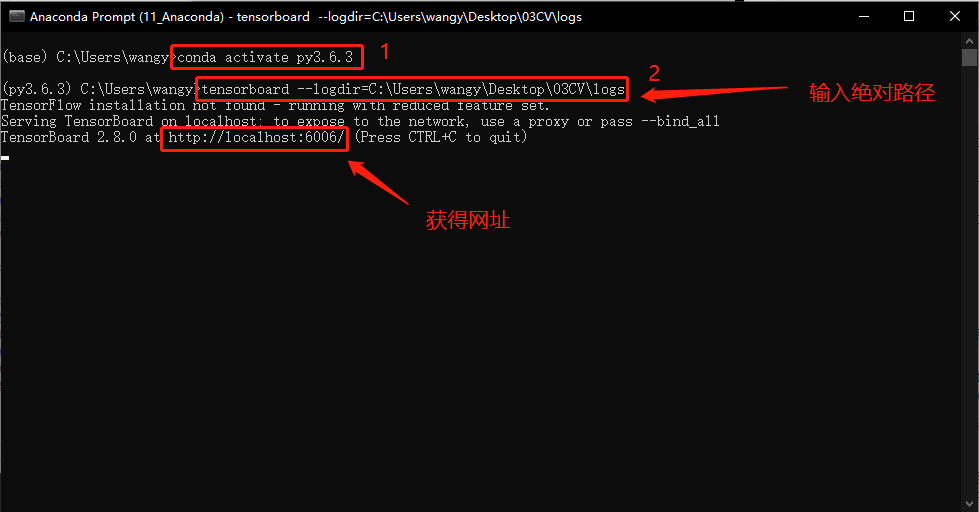

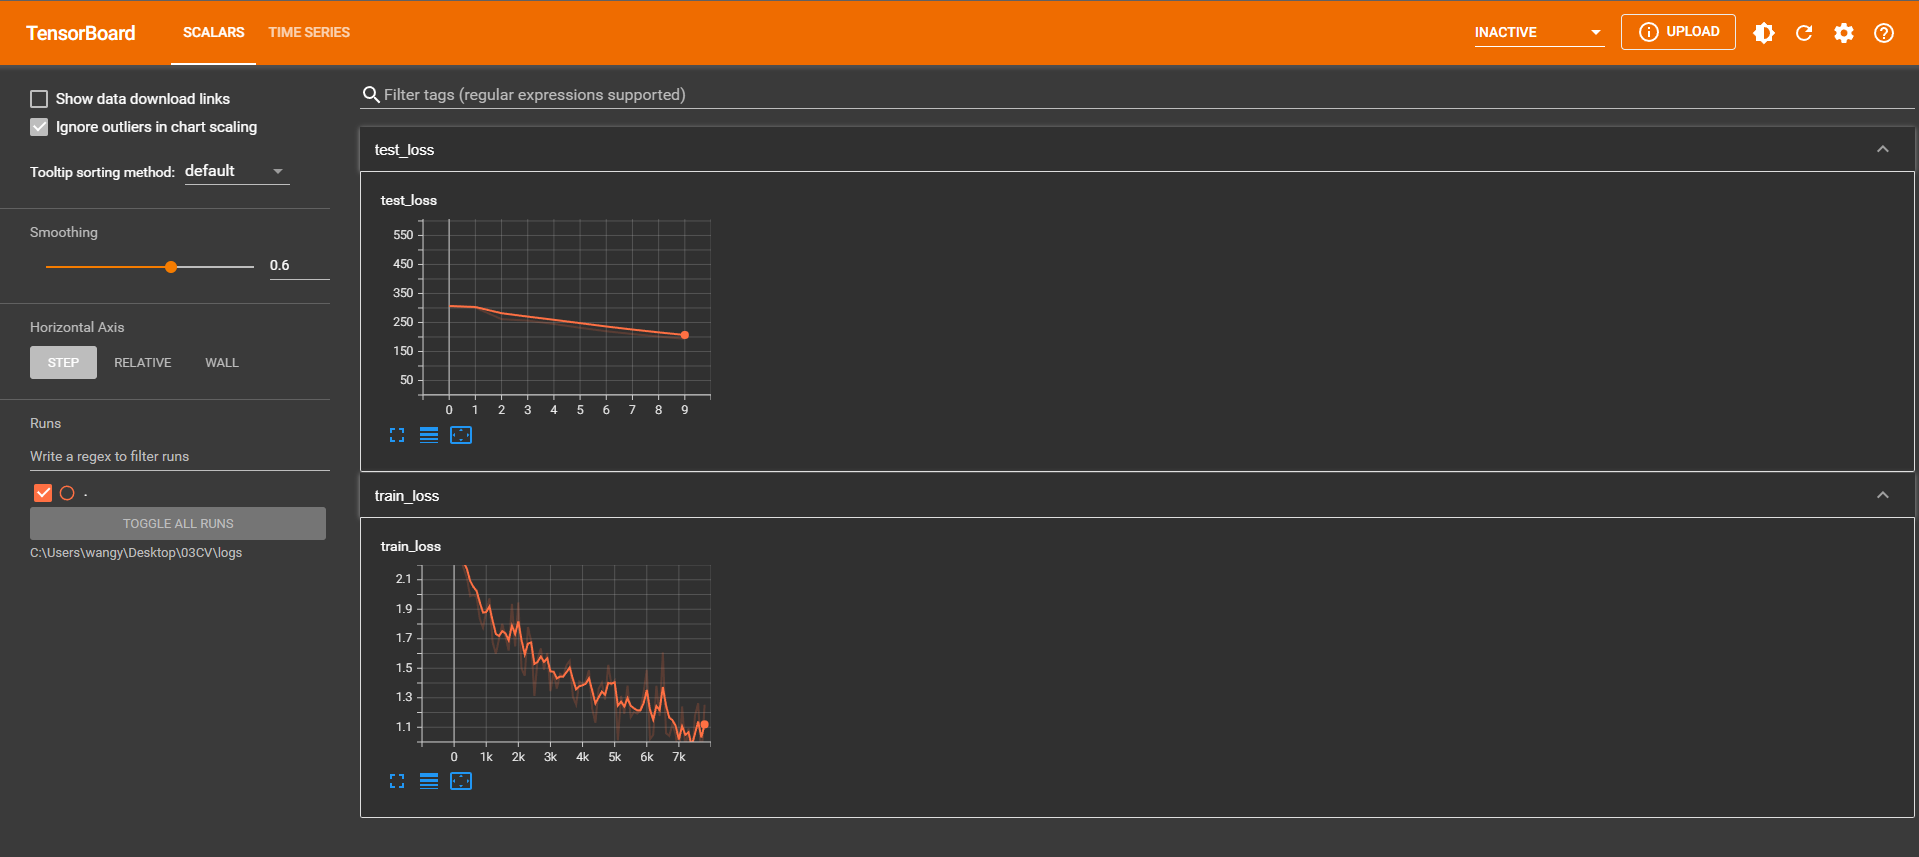

# 7. 保存每一轮后参数

In [6]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
    print("整体测试集上的Loss：{}".format(total_test_loss))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.296692132949829
训练次数：200，Loss：2.285885810852051
训练次数：300，Loss：2.279501438140869
训练次数：400，Loss：2.2302145957946777
训练次数：500，Loss：2.1076254844665527
训练次数：600，Loss：2.0241076946258545
训练次数：700，Loss：2.0326571464538574
整体测试集上的Loss：313.3945701122284
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8856056928634644
训练次数：900，Loss：1.8258416652679443
训练次数：1000，Loss：1.8736964464187622
训练次数：1100，Loss：2.009686231613159
训练次数：1200，Loss：1.7110859155654907
训练次数：1300，Loss：1.639999508857727
训练次数：1400，Loss：1.7460256814956665
训练次数：1500，Loss：1.804326057434082
整体测试集上的Loss：306.9472336769104
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7464873790740967
训练次数：1700，Loss：1.6793572902679443
训练次数：1800，Loss：1.9503461122512817
训练次数：1900，Loss：1.7317644357681274
训练次数：2000，Loss：1.9306591749191284
训练次数：2100，Loss：1.5165047645568848
训练次数：2200，Loss：1.459275722503662
训练次数：2300，Loss：1.7940567731857

# 8. argmax作用

In [7]:
import torch
outputs = torch.tensor([[0.1,0.2],
                        [0.05,0.4]])
print(outputs.argmax(0))  # 竖着看，最大值的索引
print(outputs.argmax(1))  # 横着看，最大值的索引
preds = outputs.argmax(0)
targets = torch.tensor([0,1])
print((preds == targets).sum()) # 对应位置相等的个数

tensor([0, 1])
tensor([1, 1])
tensor(2)


# 9. 打印正确率

In [8]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss：{}".format(total_test_loss))
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    writer.add_scalar("test_accuracy",total_accuracy/test_data_size,total_test_step)  
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.2990777492523193
训练次数：200，Loss：2.279019594192505
训练次数：300，Loss：2.274381637573242
训练次数：400，Loss：2.212763547897339
训练次数：500，Loss：2.0860657691955566
训练次数：600，Loss：2.026383399963379
训练次数：700，Loss：2.0226848125457764
整体测试集上的Loss：318.3006658554077
整体测试集上的正确率：0.26919999718666077
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.932318091392517
训练次数：900，Loss：1.8830816745758057
训练次数：1000，Loss：1.9455211162567139
训练次数：1100，Loss：1.973578929901123
训练次数：1200，Loss：1.7392346858978271
训练次数：1300，Loss：1.6807948350906372
训练次数：1400，Loss：1.7497491836547852
训练次数：1500，Loss：1.7937464714050293
整体测试集上的Loss：304.5683034658432
整体测试集上的正确率：0.30399999022483826
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.787430763244629
训练次数：1700，Loss：1.6468796730041504
训练次数：1800，Loss：1.9685696363449097
训练次数：1900，Loss：1.7380374670028687
训练次数：2000，Loss：1.948999285697937
训练次数：2100，Loss：1.5249638557434082
训练次

# 10. 特殊层作用

① model.train()和model.eval()的区别主要在于Batch Normalization和Dropout两层。

② 如果模型中有BN层(Batch Normalization）和 Dropout，需要在训练时添加model.train()。model.train()是保证BN层能够用到每一批数据的均值和方差。对于Dropout，model.train()是随机取一部分网络连接来训练更新参数。

③ 不启用 Batch Normalization 和 Dropout。
如果模型中有BN层(Batch Normalization）和Dropout，在测试时添加model.eval()。model.eval()是保证BN层能够用全部训练数据的均值和方差，即测试过程中要保证BN层的均值和方差不变。对于Dropout，model.eval()是利用到了所有网络连接，即不进行随机舍弃神经元。

④ 训练完train样本后，生成的模型model要用来测试样本。在model(test)之前，需要加上model.eval()，否则的话，有输入数据，即使不训练，它也会改变权值。这是model中含有BN层和Dropout所带来的的性质。

⑤ 在做one classification的时候，训练集和测试集的样本分布是不一样的，尤其需要注意这一点。

In [9]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10("./dataset",train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    tudui.train() # 当网络中有dropout层、batchnorm层时，这些层能起作用
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，Loss：{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
            writer.add_scalar("train_loss",loss.item(),total_train_step)
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    tudui.eval()  # 当网络中有dropout层、batchnorm层时，这些层不能起作用
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss：{}".format(total_test_loss))
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss",total_test_loss,total_test_step)
    writer.add_scalar("test_accuracy",total_accuracy/test_data_size,total_test_step)  
    total_test_step = total_test_step + 1
    
    torch.save(tudui, "./model/tudui_{}.pth".format(i)) # 保存每一轮训练后的结果
    #torch.save(tudui.state_dict(),"tudui_{}.path".format(i)) # 保存方式二         
    print("模型已保存")
    
writer.close()

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.292330265045166
训练次数：200，Loss：2.2909886837005615
训练次数：300，Loss：2.2775135040283203
训练次数：400，Loss：2.2197389602661133
训练次数：500，Loss：2.1354541778564453
训练次数：600，Loss：2.034959077835083
训练次数：700，Loss：2.0130105018615723
整体测试集上的Loss：319.69296860694885
整体测试集上的正确率：0.2678999900817871
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8924949169158936
训练次数：900，Loss：1.8564952611923218
训练次数：1000，Loss：1.9163199663162231
训练次数：1100，Loss：1.972761631011963
训练次数：1200，Loss：1.698002815246582
训练次数：1300，Loss：1.6668578386306763
训练次数：1400，Loss：1.7467551231384277
训练次数：1500，Loss：1.8171281814575195
整体测试集上的Loss：294.6422094106674
整体测试集上的正确率：0.3321000039577484
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7753604650497437
训练次数：1700，Loss：1.637514591217041
训练次数：1800，Loss：1.936806559562683
训练次数：1900，Loss：1.710182785987854
训练次数：2000，Loss：1.9697281122207642
训练次数：2100，Loss：1.507324457168579
训练次数